In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0

In [2]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

In [3]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/de_sa_2021_2022.xlsx")

In [5]:
df.shape

(31060, 48)

## 1. Model Building

In [6]:
#Separating the dataframe
X = df.drop(columns=['TARGET_ABUSER'])  # Features
y = df['TARGET_ABUSER']  # Target variable
#Oversampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
#current class distribution
print(Counter(y))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
X, y = sm.fit_resample(X,y)
# summarize class distribution after oversampling
print(Counter(y))
#Splitting the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Counter({0: 25193, 1: 5867})
Counter({0: 25193, 1: 25193})


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression: 
[[4293 1995]
 [1947 4362]]
TP: 4362, FP: 1995, TN: 4293, FN: 1947, Accuracy: 0.6870683496070493, Precision: 0.686172722982539, Recall: 0.6913932477413219, Specificity: 0.6827290076335878, F1 Score: 0.6887730933207011, FPR: 0.3172709923664122, ROC AUC: 0.6870611276874549
Training Decision Tree...
Confusion Matrix for Decision Tree: 
[[4571 1717]
 [1408 4901]]
TP: 4901, FP: 1717, TN: 4571, FN: 1408, Accuracy: 0.7519250615225848, Precision: 0.7405560592323965, Recall: 0.7768267554287526, Specificity: 0.726940203562341, F1 Score: 0.7582579098011913, FPR: 0.27305979643765904, ROC AUC: 0.7518834794955468
Training Random Forest...
Confusion Matrix for Random Forest: 
[[5579  709]
 [1204 5105]]
TP: 5105, FP: 709, TN: 5579, FN: 1204, Accuracy: 0.8481384456616655, Precision: 0.8780529755761954, Recall: 0.8091615152956094, Specificity: 0.8872455470737913, F1 Score: 0.8422007753856307, FPR: 0.11275445292620866, ROC AUC: 0.8482035311847003
Training XGBoost

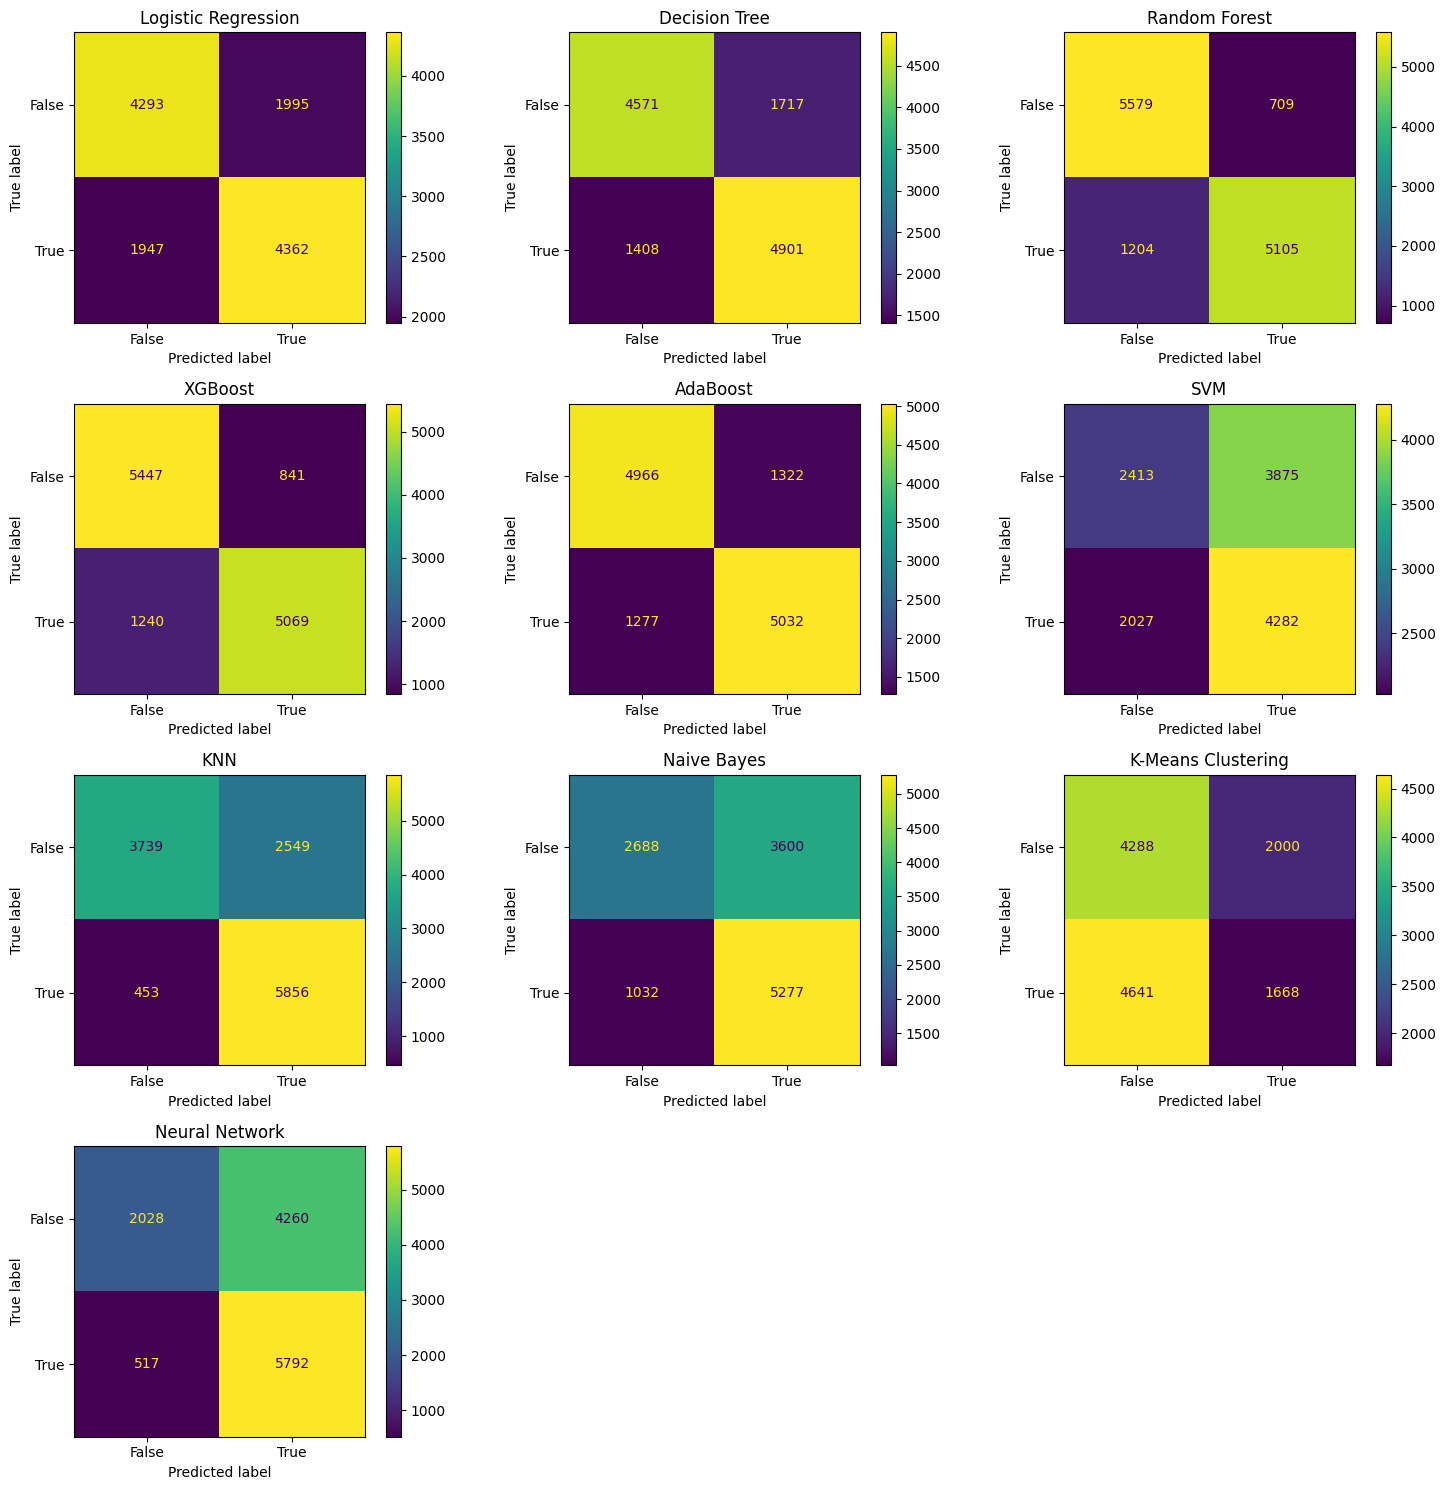

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Means Clustering': KMeans(n_clusters= 2),
    'Neural Network': MLPClassifier()
}

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn import metrics

# Create an empty list to store the results
results = []

# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Train and evaluate each classifier
for i, (name, clf) in enumerate(classifiers.items()):
    print(f"Training {name}...")
    # Fitting the model to the data
    clf.fit(X_train, y_train)
    # Predicting the output
    y_pred = clf.predict(X_test)
    # Calculating confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    # Printing the confusion matrix
    print(f"Confusion Matrix for {name}: \n{confusion_mat}")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=[False, True])
    cm_display.plot(ax=axes[i])
    axes[i].set_title(name)  # Set title for each subplot
    # Calculate evaluation metrics
    tp = confusion_mat[1, 1]
    fp = confusion_mat[0, 1]
    tn = confusion_mat[0, 0]
    fn = confusion_mat[1, 0]
    accuracy = accuracy_score(y_test, y_pred)
    precision = tp / (tp + fp)
    recall = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    fpr = fp / (fp + tn)
    # Printing and storing the evaluation metrics
    print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, Specificity: {specificity}, F1 Score: {f1}, FPR: {fpr}, ROC AUC: {auc}")
    # Storing the results in a dictionary
    results.append({'Classifier': name, 'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall,
                    'Specificity': specificity, 'F1 Score': f1, 'FPR': fpr, 'ROC AUC': auc})

# Remove extra empty subplots
for i in range(len(classifiers), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results)

In [8]:
#Changing the index of the results table
results_df.index = results_df.index + 1
results_df

,Classifier,TP,FP,TN,FN,Accuracy,Precision,Recall,Specificity,F1 Score,FPR,ROC AUC
1,Logistic Regression,4362,1995,4293,1947,0.687,0.686,0.691,0.683,0.689,0.317,0.687
2,Decision Tree,4901,1717,4571,1408,0.752,0.741,0.777,0.727,0.758,0.273,0.752
3,Random Forest,5105,709,5579,1204,0.848,0.878,0.809,0.887,0.842,0.113,0.848
4,XGBoost,5069,841,5447,1240,0.835,0.858,0.803,0.866,0.830,0.134,0.835
5,AdaBoost,5032,1322,4966,1277,0.794,0.792,0.798,0.790,0.795,0.210,0.794
6,SVM,4282,3875,2413,2027,0.531,0.525,0.679,0.384,0.592,0.616,0.531
7,KNN,5856,2549,3739,453,0.762,0.697,0.928,0.595,0.796,0.405,0.761
8,Naive Bayes,5277,3600,2688,1032,0.632,0.594,0.836,0.427,0.695,0.573,0.632
9,K-Means Clustering,1668,2000,4288,4641,0.473,0.455,0.264,0.682,0.334,0.318,0.473
10,Neural Network,5792,4260,2028,517,0.621,0.576,0.918,0.323,0.708,0.677,0.620


Calculating for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PR AUC: 0.7247242336730967
Calculating for Decision Tree...
PR AUC: 0.8198542011394668
Calculating for Random Forest...
PR AUC: 0.9305818232856254
Calculating for XGBoost...
PR AUC: 0.9272790295333384
Calculating for AdaBoost...
PR AUC: 0.8941848975887252
Calculating for SVM...
PR AUC: 0.6822860876798249
Calculating for KNN...
PR AUC: 0.8803528247245145
Calculating for Naive Bayes...
PR AUC: 0.787680089613289
Calculating for K-Means Clustering...
PR AUC: 0.5467718010372145
Calculating for Neural Network...
PR AUC: 0.7469988028466149


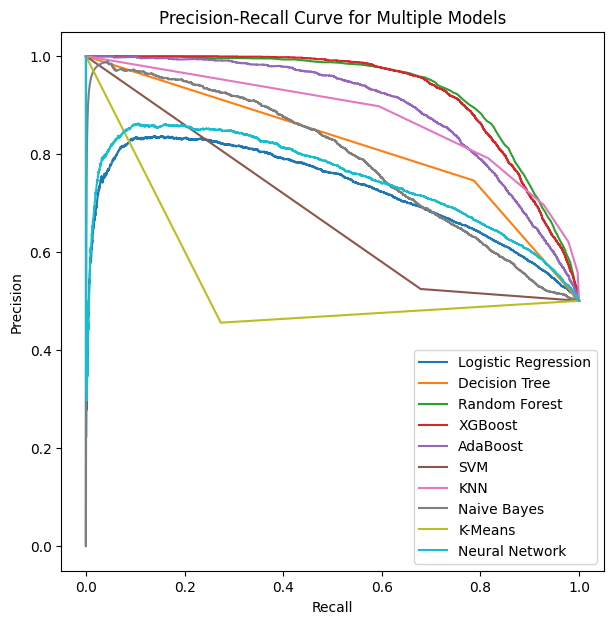

In [9]:
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
plt.figure(figsize=(7,7))
# Create an empty list to store the results
auc_precision_recall_list = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Calculating for {name}...")
    # Fitting the model to the data
    clf.fit(X_train, y_train)
    # Get the predicted probability of testing data
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.predict(X_test)
    # Average precision score
    average_precision = average_precision_score(y_test, y_score)
    #print(f"Average Precision: {average_precision}")
    # Data to plot precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    #Plotting the curves
    plt.plot(recall, precision)
    # Use AUC function to calculate the area under the curve of precision-recall curve
    auc_precision_recall = auc(recall, precision)
    print(f"PR AUC: {auc_precision_recall}")
    # Append auc_precision_recall to the list
    auc_precision_recall_list.append(auc_precision_recall)

# Add auc_precision_recall_list as a new column to results_df
results_df['PR AUC'] = auc_precision_recall_list
# Showing the graph
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Models')
plt.legend(['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'SVM', 'KNN', 'Naive Bayes', 'K-Means', 'Neural Network'])
plt.show()

Calculating for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Calculating for Decision Tree...
Calculating for Random Forest...
Calculating for XGBoost...
Calculating for AdaBoost...
Calculating for SVM...
Calculating for KNN...
Calculating for Naive Bayes...
Calculating for K-Means Clustering...
Calculating for Neural Network...


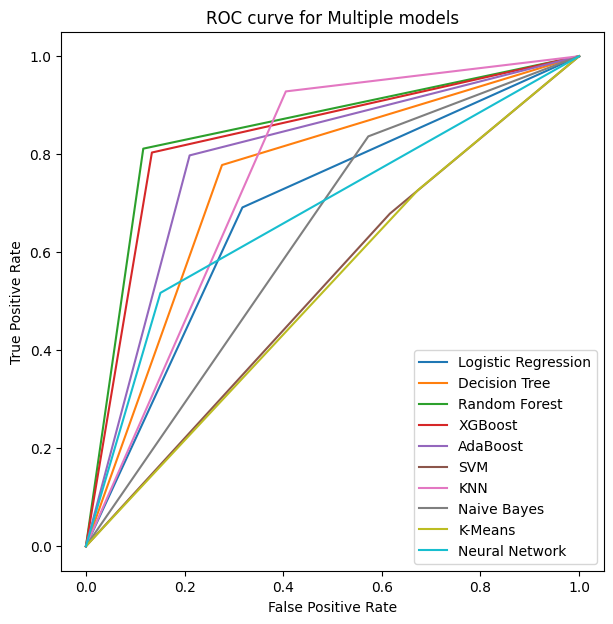

In [10]:
#Creating the ROC curve
plt.figure(figsize=(7,7))
# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Calculating for {name}...")
    # fitting the model to the data
    clf.fit(X_train, y_train)
    # predicting the output
    y_pred = clf.predict(X_test)
    #Getting the metrics
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    #Creating the curve
    plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for Multiple models')
plt.legend(['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'SVM', 'KNN', 'Naive Bayes', 'K-Means', 'Neural Network'])
plt.show()

In [11]:
results_df

,Classifier,TP,FP,TN,FN,Accuracy,Precision,Recall,Specificity,F1 Score,FPR,ROC AUC,PR AUC
1,Logistic Regression,4362,1995,4293,1947,0.687,0.686,0.691,0.683,0.689,0.317,0.687,0.725
2,Decision Tree,4901,1717,4571,1408,0.752,0.741,0.777,0.727,0.758,0.273,0.752,0.820
3,Random Forest,5105,709,5579,1204,0.848,0.878,0.809,0.887,0.842,0.113,0.848,0.931
4,XGBoost,5069,841,5447,1240,0.835,0.858,0.803,0.866,0.830,0.134,0.835,0.927
5,AdaBoost,5032,1322,4966,1277,0.794,0.792,0.798,0.790,0.795,0.210,0.794,0.894
6,SVM,4282,3875,2413,2027,0.531,0.525,0.679,0.384,0.592,0.616,0.531,0.682
7,KNN,5856,2549,3739,453,0.762,0.697,0.928,0.595,0.796,0.405,0.761,0.880
8,Naive Bayes,5277,3600,2688,1032,0.632,0.594,0.836,0.427,0.695,0.573,0.632,0.788
9,K-Means Clustering,1668,2000,4288,4641,0.473,0.455,0.264,0.682,0.334,0.318,0.473,0.547
10,Neural Network,5792,4260,2028,517,0.621,0.576,0.918,0.323,0.708,0.677,0.620,0.747


In [12]:
# Styling the dataframe for better visibility and understanding
# Define a function to highlight the maximum value in specific columns
def highlight_max_specific_columns(data, columns):
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: #93C572' if v else '' for v in is_max]

    return data.style.apply(highlight_max, subset=columns)

# Define a function to highlight the minimum value in specific columns
def highlight_min_specific_columns(data, columns):
    def highlight_min(s):
        is_min = s == s.min()
        return ['background-color: #F88379' if v else '' for v in is_min]

    return data.apply(highlight_min, subset=columns)

# Highlight the highest and lowest values in required columns with different colors
styled_df = highlight_max_specific_columns(results_df, ['Accuracy','Precision','Recall','Specificity','F1 Score','FPR','ROC AUC','PR AUC'])
styled_df = highlight_min_specific_columns(styled_df, ['Accuracy','Precision','Recall','Specificity','F1 Score','FPR','ROC AUC','PR AUC'])

styled_df = styled_df.set_properties(**{'text-transform': 'capitalize','border': '1.3px black'})
#styled_df = styled_df.set_precision(4)

In [13]:
styled_df

,Classifier,TP,FP,TN,FN,Accuracy,Precision,Recall,Specificity,F1 Score,FPR,ROC AUC,PR AUC
1,Logistic Regression,4362,1995,4293,1947,0.687068,0.686173,0.691393,0.682729,0.688773,0.317271,0.687061,0.724724
2,Decision Tree,4901,1717,4571,1408,0.751925,0.740556,0.776827,0.726940,0.758258,0.273060,0.751883,0.819854
3,Random Forest,5105,709,5579,1204,0.848138,0.878053,0.809162,0.887246,0.842201,0.112754,0.848204,0.930582
4,XGBoost,5069,841,5447,1240,0.834802,0.857699,0.803455,0.866253,0.829691,0.133747,0.834854,0.927279
5,AdaBoost,5032,1322,4966,1277,0.793681,0.791942,0.797591,0.789758,0.794756,0.210242,0.793675,0.894185
6,SVM,4282,3875,2413,2027,0.531476,0.524948,0.678713,0.383747,0.592009,0.616253,0.531230,0.682286
7,KNN,5856,2549,3739,453,0.761689,0.696728,0.928198,0.594625,0.795977,0.405375,0.761411,0.880353
8,Naive Bayes,5277,3600,2688,1032,0.632293,0.594458,0.836424,0.427481,0.694982,0.572519,0.631953,0.787680
9,K-Means Clustering,1668,2000,4288,4641,0.472811,0.454744,0.264384,0.681934,0.334369,0.318066,0.473159,0.546772
10,Neural Network,5792,4260,2028,517,0.620783,0.576204,0.918054,0.322519,0.708025,0.677481,0.620286,0.746999


Showing the graphs for top 3 classifiers only

Calculating for Random Forest...
0.9314179442004269
Calculating for XGBoost...
0.9272790295333384
Calculating for AdaBoost...
0.8941848975887252


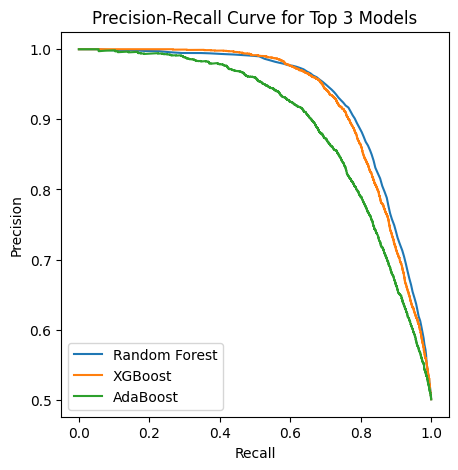

In [14]:
# Define the classifiers
classifierstop3 = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

# Train and evaluate each classifier
for name, clf in classifierstop3.items():
    print(f"Calculating for {name}...")
    # fitting the model to the data
    clf.fit(X_train, y_train)
    # Get the predicited probability of testing data
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        y_score = clf.predict(X_test)
    # Average precision score
    average_precision = average_precision_score(y_test, y_score)
    #print(average_precision)
    # Data to plot precision - recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    # Use AUC function to calculate the area under the curve of precision recall curve
    auc_precision_recall = auc(recall, precision)
    print(auc_precision_recall)
    plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Top 3 Models')
plt.legend(['Random Forest', 'XGBoost', 'AdaBoost'])
plt.show()

Calculating for Random Forest...
Calculating for XGBoost...
Calculating for AdaBoost...


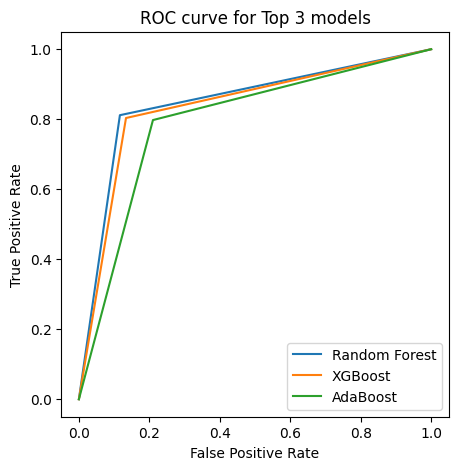

In [15]:
# Define the classifiers
classifierstop3 = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

plt.figure(figsize=(5,5))

# Train and evaluate each classifier
for name, clf in classifierstop3.items():
    print(f"Calculating for {name}...")
    # fitting the model to the data
    clf.fit(X_train, y_train)
    # predicting the output
    y_pred = clf.predict(X_test)
    #Getting the metrics
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    #Creating the curve
    plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for Top 3 models')
plt.legend(['Random Forest', 'XGBoost', 'AdaBoost'])
plt.show()

## 2. Feature Importances

### 2.1 Importance with domain expert integration (method gini importance)

Training Random Forest...


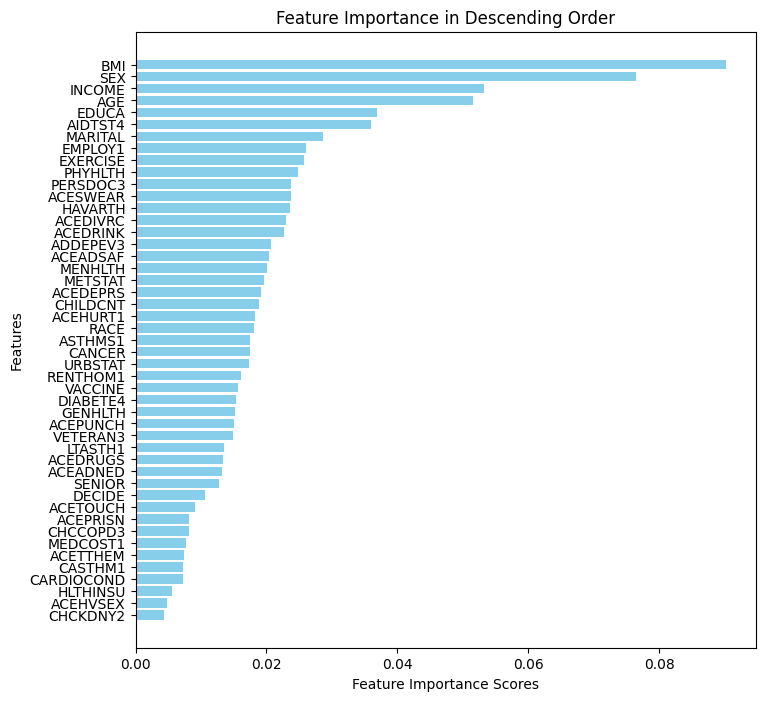

Training XGBoost...


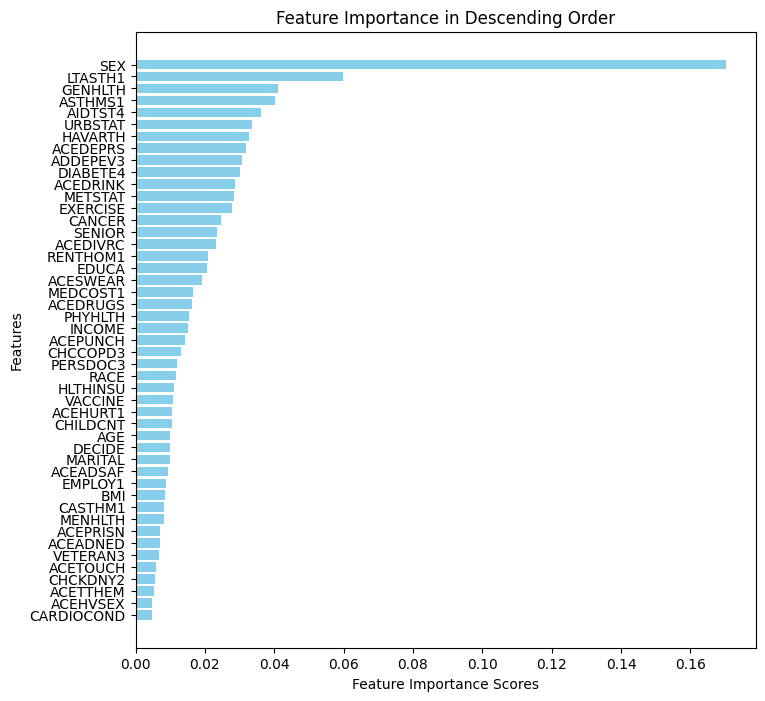

Training AdaBoost...


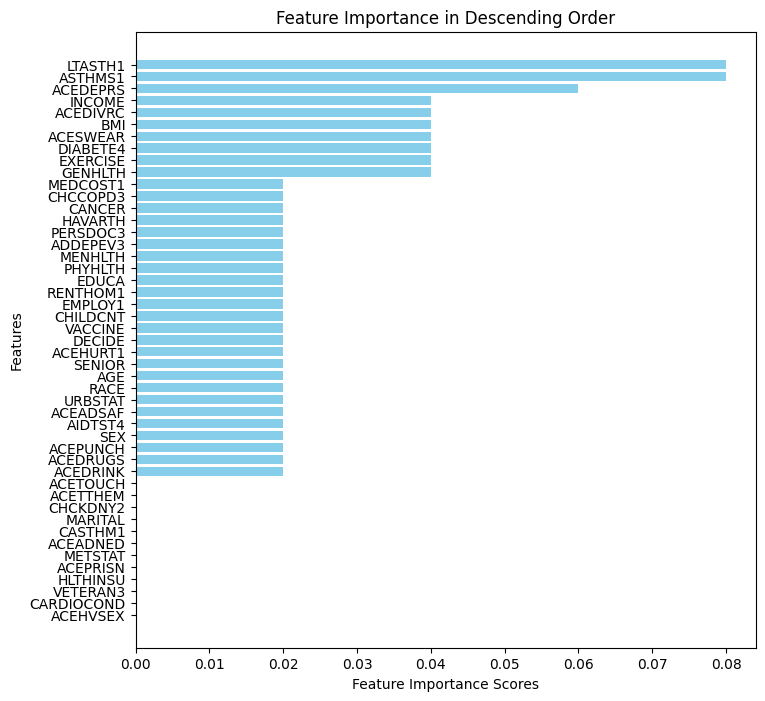

In [16]:
# Define the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

importance_results = pd.DataFrame()

# Define a function to merge DataFrames
def merge_feature_results(feature_names_list, feature_importances_list):

    feature_results = pd.DataFrame({'Feature Names': feature_names_list, 'Importance': feature_importances_list})
    return feature_results

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    # fitting the model to the data
    clf.fit(X_train, y_train)
    # predicting the output
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)

    # get feature importance
    feature_importances = clf.feature_importances_

    plt.rcParams["figure.figsize"] = (8,8)
    # Get feature names
    feature_names = X_train.columns.tolist()

    # Sort the feature importances and feature names in descending order
    sorted_indices = np.argsort(feature_importances)
    sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]

    # Merge the current model's and dataset's feature results
    feature_results = merge_feature_results(sorted_feature_names, sorted_feature_importances)

    # Merge with the existing merged DataFrame
    if importance_results.empty:
        importance_results = feature_results
    else:
        importance_results = pd.merge(importance_results, feature_results, on='Feature Names', how='outer')

    # Plot the horizontal bar chart for feature importance
    plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Features')
    plt.title('Feature Importance in Descending Order')
    plt.show()

# Display the merged DataFrame
# print(importance_results)

In [17]:
# Converting the feature importance values for each classifier into a dataframe
impfea_df = importance_results.copy(deep=True)
#Renaming columns for better understanding
importance_results.rename(columns = {'Importance_x':'ModelRF','Importance_y':'ModelXGB','Importance':'ModelADA'}, inplace = True)

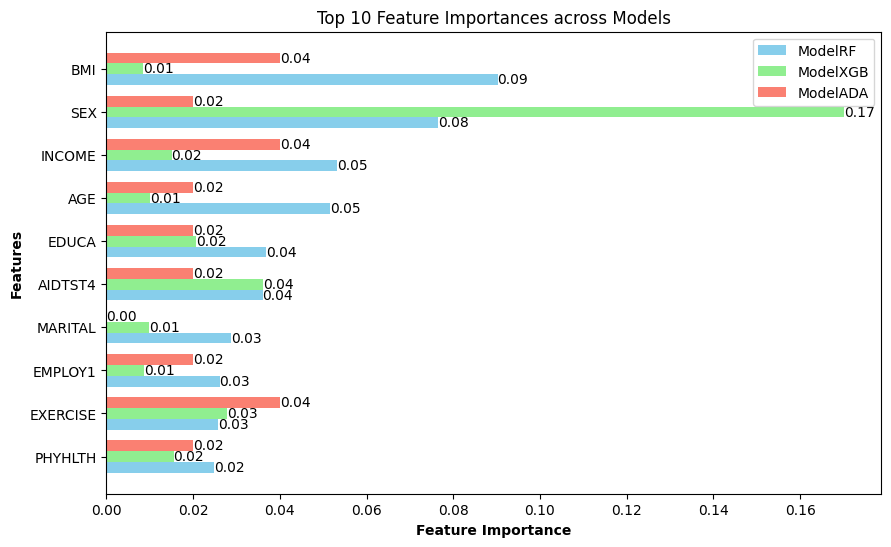

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Select the top 10 features based on any criteria (e.g., average importance across models)
top_features = importance_results.sort_values(by=['ModelRF', 'ModelXGB', 'ModelADA'], ascending=False)['Feature Names'].head(10)

# Prepare data for plotting
model1_importances = importance_results.loc[importance_results['Feature Names'].isin(top_features), 'ModelRF']
model2_importances = importance_results.loc[importance_results['Feature Names'].isin(top_features), 'ModelXGB']
model3_importances = importance_results.loc[importance_results['Feature Names'].isin(top_features), 'ModelADA']

# Set the height of the bars
bar_height = 0.25

# Set the positions of the bars on the y-axis
y_pos = np.arange(len(top_features))
y_pos_rev = y_pos[::-1]

# Plotting
plt.figure(figsize=(10, 6))

bars1 = plt.barh(y_pos, model1_importances, height=bar_height, color='skyblue', label='ModelRF')
bars2 = plt.barh(y_pos + bar_height, model2_importances, height=bar_height, color='lightgreen', label='ModelXGB')
bars3 = plt.barh(y_pos + bar_height * 2, model3_importances, height=bar_height, color='salmon', label='ModelADA')

# Add yticks on the middle of the group bars
plt.yticks(y_pos_rev + bar_height, top_features)

# Add value annotations to each bar
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width),
                 va='center', ha='left', color='black')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Create legend & Show graphic
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('Top 10 Feature Importances across Models')
plt.legend()
plt.show()


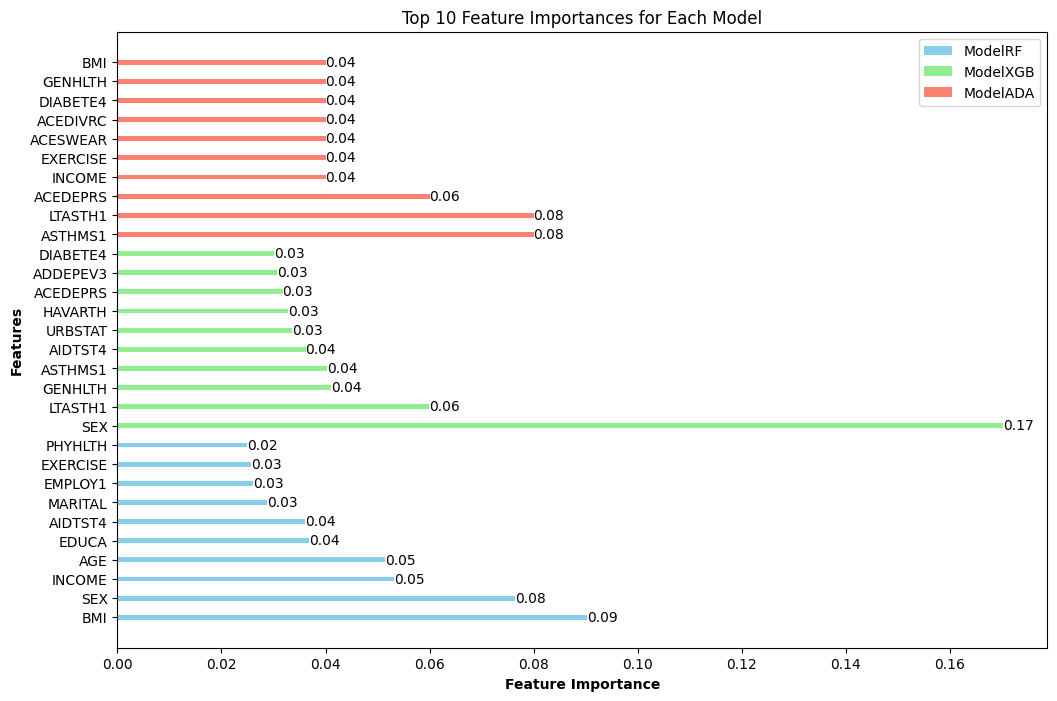

In [19]:
import matplotlib.pyplot as plt
import numpy as np


# Select the top 10 features for each model
top_features_model1 = importance_results.sort_values(by='ModelRF', ascending=False).head(10)
top_features_model2 = importance_results.sort_values(by='ModelXGB', ascending=False).head(10)
top_features_model3 = importance_results.sort_values(by='ModelADA', ascending=False).head(10)

# Combine the features from all models
features = np.concatenate((top_features_model1['Feature Names'],
                           top_features_model2['Feature Names'],
                           top_features_model3['Feature Names']))
# Combine the importances from all models
model1_importances = top_features_model1['ModelRF']
model2_importances = top_features_model2['ModelXGB']
model3_importances = top_features_model3['ModelADA']
importances = np.concatenate((model1_importances, model2_importances, model3_importances))

# Set the height of the bars
bar_height = 0.25

# Set the positions of the bars on the y-axis
y_pos = np.arange(len(features))
y_pos_model1 = y_pos[:10]
y_pos_model2 = y_pos[10:20]
y_pos_model3 = y_pos[20:]

# Plotting
plt.figure(figsize=(12, 8))

bars1 = plt.barh(y_pos_model1, model1_importances, height=bar_height, color='skyblue', label='ModelRF')
bars2 = plt.barh(y_pos_model2, model2_importances, height=bar_height, color='lightgreen', label='ModelXGB')
bars3 = plt.barh(y_pos_model3, model3_importances, height=bar_height, color='salmon', label='ModelADA')

# Add yticks on the middle of the group bars
plt.yticks(y_pos, features)

# Add value annotations to each bar
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width),
                 va='center', ha='left', color='black')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Create legend & Show graphic
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('Top 10 Feature Importances for Each Model')
plt.legend()
plt.show()


### 2.2 Importance without domain expert integration (method gini importance)

In [20]:
dffish = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/eda_sa_2021_2022.xlsx")

In [21]:
# Replacing 7 with 9 so as to create a common category of missing, refused or don't know for these questions
value_to_replace = 7
new_value = 9
columns_to_replace = ['PERSDOC3','MEDCOST1','CVDINFR4','CVDCRHD4','CHCSCNCR','CHCOCNCR','CHCCOPD3','CHCKDNY2','DIABETE4','HAVARTH5','ADDEPEV3',
'RENTHOM1','VETERAN3','DECIDE','FLUSHOT7','PNEUVAC4','ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC','ACEPUNCH','ACEHURT1',
 'ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX','ACEADSAF','ACEADNED','SMOKE100']

 # Loop through each column in the list and replace the value
for column in columns_to_replace:
    dffish[column] = dffish[column].replace(value_to_replace, new_value)

In [22]:
fisher = ['_STATE', 'SEXVAR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'ADDEPEV3', 'DIABETE4', 'MARITAL', 'VETERAN3', 'EMPLOY1', 'INCOME3',
          'SMOKE100', 'FLUSHOT7', 'HIVTST7', 'ACEHURT1', 'ACESWEAR', 'ACEADSAF', 'ACEADNED', '_URBSTAT', '_DUALUSE', '_MENT14D', '_HCVU652',
          '_AGEG5YR', '_RFBMI5', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7', 'TARGET_ABUSER']

In [23]:
dffish=dffish[fisher]

In [24]:
dffish.shape

(31060, 31)

In [25]:
#Separating the dataframe
Xf = dffish.drop(columns=['TARGET_ABUSER'])  # Features
yf = dffish['TARGET_ABUSER']  # Target variable
#Oversampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
#current class distribution
print(Counter(yf))
# define oversample strategy
sm = SMOTE(random_state=42)
# fit and apply the transform
Xf, yf = sm.fit_resample(Xf,yf)
# summarize class distribution after oversampling
print(Counter(yf))
#Splitting the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size = 0.25)

Counter({0: 25193, 1: 5867})
Counter({0: 25193, 1: 25193})


Training Random Forest...


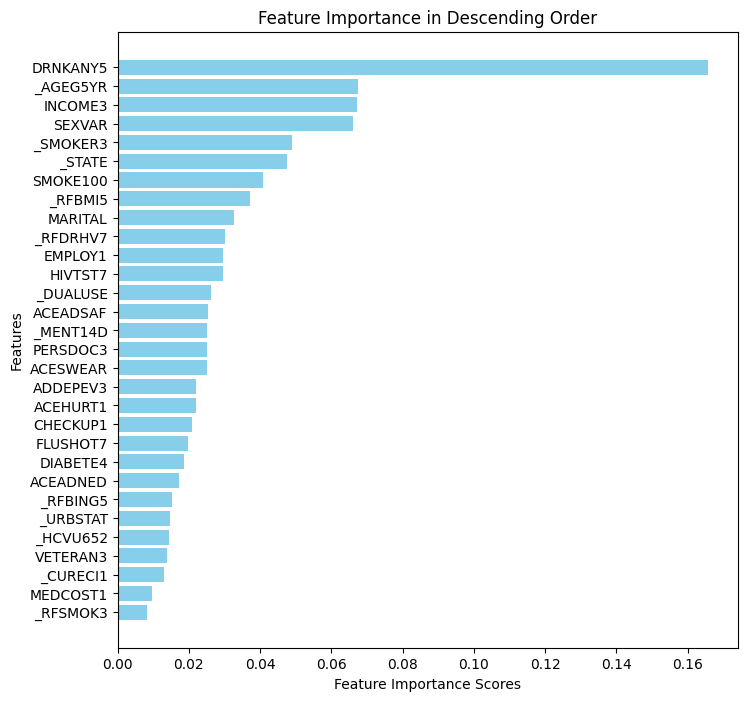

Training XGBoost...


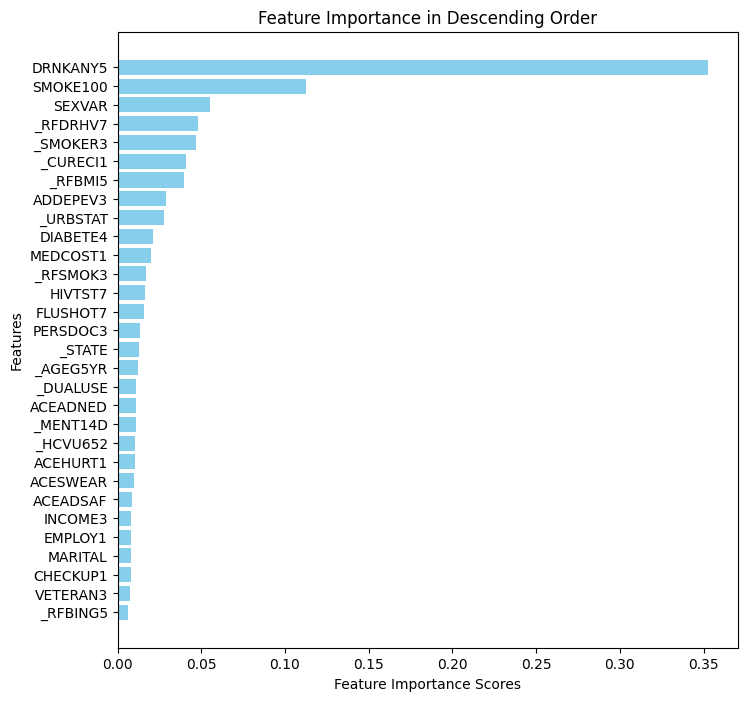

Training AdaBoost...


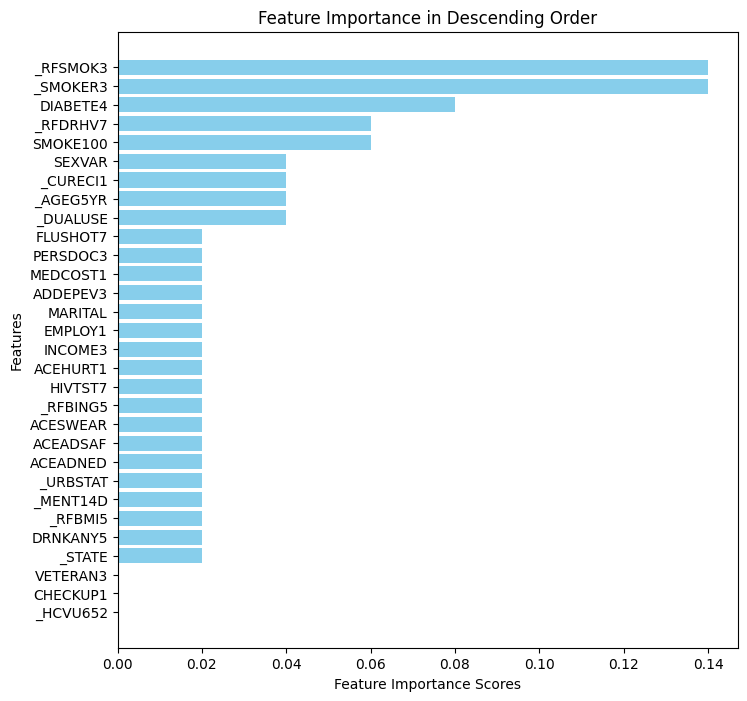

In [26]:
# Define the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

importance_resultsf = pd.DataFrame()

# Define a function to merge DataFrames
def merge_feature_results(feature_names_list, feature_importances_list):

    feature_results = pd.DataFrame({'Feature Names': feature_names_list, 'Importance': feature_importances_list})
    return feature_results

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    # fitting the model to the data
    clf.fit(X_trainf, y_trainf)
    # predicting the output
    y_predf = clf.predict(X_testf)
    y_scoref = clf.predict_proba(X_testf)

    # get feature importance
    feature_importancesf = clf.feature_importances_

    plt.rcParams["figure.figsize"] = (8,8)
    # Get feature names
    feature_namesf = X_trainf.columns.tolist()

    # Sort the feature importances and feature names in descending order
    sorted_indicesf = np.argsort(feature_importancesf)
    sorted_feature_importancesf = [feature_importancesf[i] for i in sorted_indicesf]
    sorted_feature_namesf = [feature_namesf[i] for i in sorted_indicesf]

    # Merge the current model's and dataset's feature results
    feature_resultsf = merge_feature_results(sorted_feature_namesf, sorted_feature_importancesf)

    # Merge with the existing merged DataFrame
    if importance_resultsf.empty:
        importance_resultsf = feature_resultsf
    else:
        importance_resultsf = pd.merge(importance_resultsf, feature_resultsf, on='Feature Names', how='outer')

    # Plot the horizontal bar chart for feature importance
    plt.barh(sorted_feature_namesf, sorted_feature_importancesf, color='skyblue')
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Features')
    plt.title('Feature Importance in Descending Order')
    plt.show()

# Display the merged DataFrame
# print(importance_results)

In [27]:
# Converting the feature importance values for each classifier into a dataframe
impfea_dff = importance_resultsf.copy(deep=True)
#Renaming columns for better understanding
importance_resultsf.rename(columns = {'Importance_x':'ModelRF','Importance_y':'ModelXGB','Importance':'ModelADA'}, inplace = True)

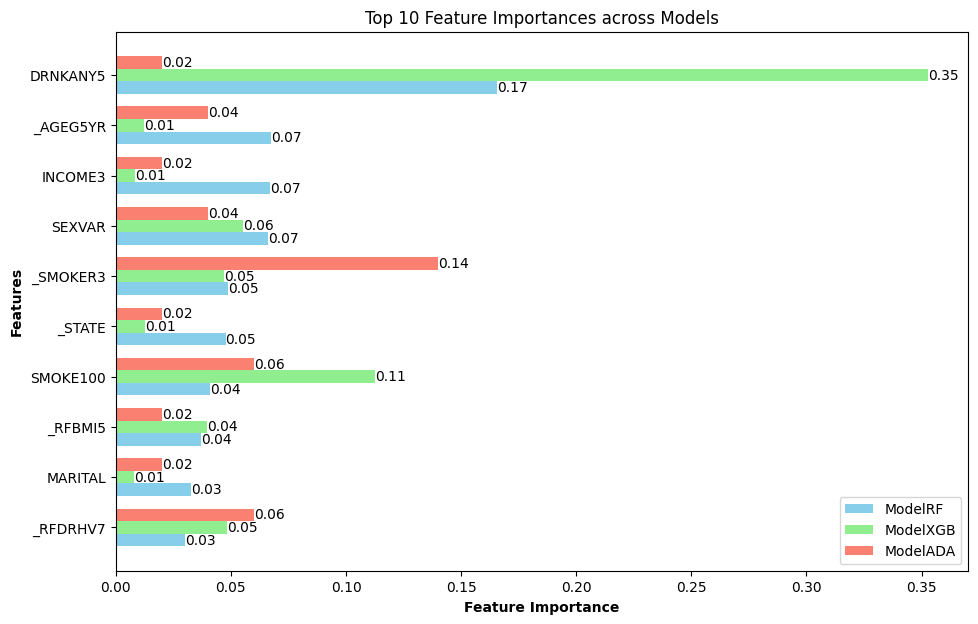

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Select the top 10 features based on any criteria (e.g., average importance across models)
top_features = importance_resultsf.sort_values(by=['ModelRF', 'ModelXGB', 'ModelADA'], ascending=False)['Feature Names'].head(10)

# Prepare data for plotting
model1_importances = importance_resultsf.loc[importance_resultsf['Feature Names'].isin(top_features), 'ModelRF']
model2_importances = importance_resultsf.loc[importance_resultsf['Feature Names'].isin(top_features), 'ModelXGB']
model3_importances = importance_resultsf.loc[importance_resultsf['Feature Names'].isin(top_features), 'ModelADA']

# Set the height of the bars
bar_height = 0.25

# Set the positions of the bars on the y-axis
y_pos = np.arange(len(top_features))
y_pos_rev = y_pos[::-1]

# Plotting
plt.figure(figsize=(11, 7))

bars1 = plt.barh(y_pos, model1_importances, height=bar_height, color='skyblue', label='ModelRF')
bars2 = plt.barh(y_pos + bar_height, model2_importances, height=bar_height, color='lightgreen', label='ModelXGB')
bars3 = plt.barh(y_pos + bar_height * 2, model3_importances, height=bar_height, color='salmon', label='ModelADA')

# Add yticks on the middle of the group bars
plt.yticks(y_pos_rev + bar_height, top_features)

# Add value annotations to each bar
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width),
                 va='center', ha='left', color='black')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Create legend & Show graphic
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('Top 10 Feature Importances across Models')
plt.legend()
plt.show()


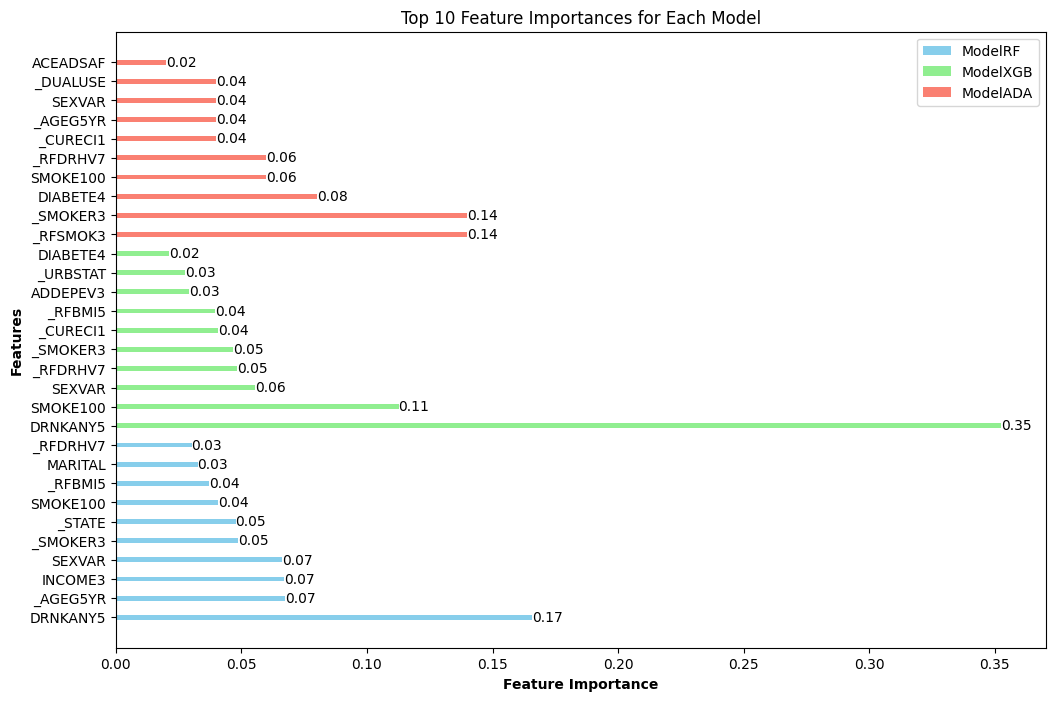

In [29]:
import matplotlib.pyplot as plt
import numpy as np


# Select the top 10 features for each model
top_features_model1 = importance_resultsf.sort_values(by='ModelRF', ascending=False).head(10)
top_features_model2 = importance_resultsf.sort_values(by='ModelXGB', ascending=False).head(10)
top_features_model3 = importance_resultsf.sort_values(by='ModelADA', ascending=False).head(10)

# Combine the features from all models
features = np.concatenate((top_features_model1['Feature Names'],
                           top_features_model2['Feature Names'],
                           top_features_model3['Feature Names']))
# Combine the importances from all models
model1_importances = top_features_model1['ModelRF']
model2_importances = top_features_model2['ModelXGB']
model3_importances = top_features_model3['ModelADA']
importances = np.concatenate((model1_importances, model2_importances, model3_importances))

# Set the height of the bars
bar_height = 0.25

# Set the positions of the bars on the y-axis
y_pos = np.arange(len(features))
y_pos_model1 = y_pos[:10]
y_pos_model2 = y_pos[10:20]
y_pos_model3 = y_pos[20:]

# Plotting
plt.figure(figsize=(12, 8))

bars1 = plt.barh(y_pos_model1, model1_importances, height=bar_height, color='skyblue', label='ModelRF')
bars2 = plt.barh(y_pos_model2, model2_importances, height=bar_height, color='lightgreen', label='ModelXGB')
bars3 = plt.barh(y_pos_model3, model3_importances, height=bar_height, color='salmon', label='ModelADA')

# Add yticks on the middle of the group bars
plt.yticks(y_pos, features)

# Add value annotations to each bar
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width),
                 va='center', ha='left', color='black')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Create legend & Show graphic
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('Top 10 Feature Importances for Each Model')
plt.legend()
plt.show()


##3. Model Improvement

### 3.1 Hyperparameter Tuning

In [30]:
#Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier
rf_clf = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [300, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    rf_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available processors
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Highest accuracy found: ", grid_search.best_score_)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Highest accuracy found:  0.8489243520436357


In [31]:
#Hyperparameter Tuning for XGBoost
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_clf = XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available processors
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Highest accuracy found: ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Highest accuracy found:  0.8391596574860556


### 3.2 Neural Networks

In [32]:
#1. Multi Layer Perceptron

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
# Train the model on the training data
mlp.fit(X_train, y_train)
# Make predictions on the test data
y_pred = mlp.predict(X_test)
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
from sklearn.metrics import log_loss
# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = mlp.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
# Calculate the binary cross-entropy loss
loss = log_loss(y_test, y_pred_proba)
print("Binary Cross-Entropy Loss:", loss)
name = 'Multi Layer Perceptron'
nn = []
nn.append({'Model': name, 'Accuracy': accuracy, 'Loss':loss})

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70      6288
           1       0.70      0.72      0.71      6309

    accuracy                           0.71     12597
   macro avg       0.71      0.71      0.71     12597
weighted avg       0.71      0.71      0.71     12597

Binary Cross-Entropy Loss: 0.5779497548416107


In [33]:
#2. DNN
from keras.models import Sequential
from keras.layers import Dense

# Building DNN model
dnn_model = Sequential()
dnn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train DNN model
dnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate DNN model
dnn_loss, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print("DNN Model Evaluation - Loss: {:.4f}, Accuracy: {:.4f}".format(dnn_loss, dnn_accuracy))

# Predictions
dnn_predictions = dnn_model.predict(X_test)
dnn_predictions = np.round(dnn_predictions).astype(int)

# Classification report for DNN
print("DNN Model Classification Report:")
print(classification_report(y_test, dnn_predictions))
name = 'Deep Neural Network'
nn.append({'Model': name, 'Accuracy': dnn_accuracy, 'Loss': dnn_loss})

Epoch 1/30
1181/1181 [==============================] - 4s 3ms/step - loss: 2.0090 - accuracy: 0.5156 - val_loss: 2.2412 - val_accuracy: 0.4992
Epoch 2/30
1181/1181 [==============================] - 3s 3ms/step - loss: 1.2047 - accuracy: 0.5424 - val_loss: 1.8355 - val_accuracy: 0.5027
Epoch 3/30
1181/1181 [==============================] - 3s 3ms/step - loss: 1.0267 - accuracy: 0.5670 - val_loss: 3.2505 - val_accuracy: 0.4992
Epoch 4/30
1181/1181 [==============================] - 5s 4ms/step - loss: 1.0389 - accuracy: 0.5702 - val_loss: 0.6005 - val_accuracy: 0.6952
Epoch 5/30
1181/1181 [==============================] - 3s 3ms/step - loss: 0.8798 - accuracy: 0.5892 - val_loss: 0.6026 - val_accuracy: 0.6914
Epoch 6/30
1181/1181 [==============================] - 3s 2ms/step - loss: 0.9224 - accuracy: 0.5907 - val_loss: 0.6179 - val_accuracy: 0.6765
Epoch 7/30
1181/1181 [==============================] - 3s 2ms/step - loss: 0.8165 - accuracy: 0.6069 - val_loss: 0.6135 - val_accuracy:

In [34]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
Xcnn = scal.fit_transform(X)

#Splitting the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(Xcnn, y, test_size = 0.25)

In [35]:
# 3. CNN
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape data for Conv1D input
X_train_reshaped = X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1], 1)
X_test_reshaped = X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1], 1)

# Building CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(MaxPooling1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(X_train_reshaped, y_train_cnn, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test_cnn))

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test_cnn)
print("CNN Model Evaluation - Loss: {:.4f}, Accuracy: {:.4f}".format(cnn_loss, cnn_accuracy))

# Predictions
cnn_predictions = cnn_model.predict(X_test_reshaped)
cnn_predictions = np.round(cnn_predictions).astype(int)

# Classification report for CNN
print("CNN Model Classification Report:")
print(classification_report(y_test_cnn, cnn_predictions))

name = 'Convolutional Neural Network'
nn.append({'Model': name, 'Accuracy': cnn_accuracy, 'Loss': cnn_loss})

Epoch 1/20
1181/1181 [==============================] - 7s 6ms/step - loss: 0.5580 - accuracy: 0.7171 - val_loss: 0.5096 - val_accuracy: 0.7620
Epoch 2/20
1181/1181 [==============================] - 4s 4ms/step - loss: 0.4910 - accuracy: 0.7684 - val_loss: 0.4836 - val_accuracy: 0.7765
Epoch 3/20
1181/1181 [==============================] - 4s 3ms/step - loss: 0.4759 - accuracy: 0.7779 - val_loss: 0.4852 - val_accuracy: 0.7807
Epoch 4/20
1181/1181 [==============================] - 7s 6ms/step - loss: 0.4700 - accuracy: 0.7843 - val_loss: 0.4692 - val_accuracy: 0.7864
Epoch 5/20
1181/1181 [==============================] - 5s 4ms/step - loss: 0.4648 - accuracy: 0.7863 - val_loss: 0.4644 - val_accuracy: 0.7857
Epoch 6/20
1181/1181 [==============================] - 4s 3ms/step - loss: 0.4607 - accuracy: 0.7889 - val_loss: 0.4735 - val_accuracy: 0.7745
Epoch 7/20
1181/1181 [==============================] - 6s 5ms/step - loss: 0.4572 - accuracy: 0.7915 - val_loss: 0.4569 - val_accuracy:

In [36]:
# Create a DataFrame from the list of results
results_nn = pd.DataFrame(nn)

In [37]:
results_nn

,Model,Accuracy,Loss
0,Multi Layer Perceptron,0.709,0.578
1,Deep Neural Network,0.647,0.636
2,Convolutional Neural Network,0.793,0.439


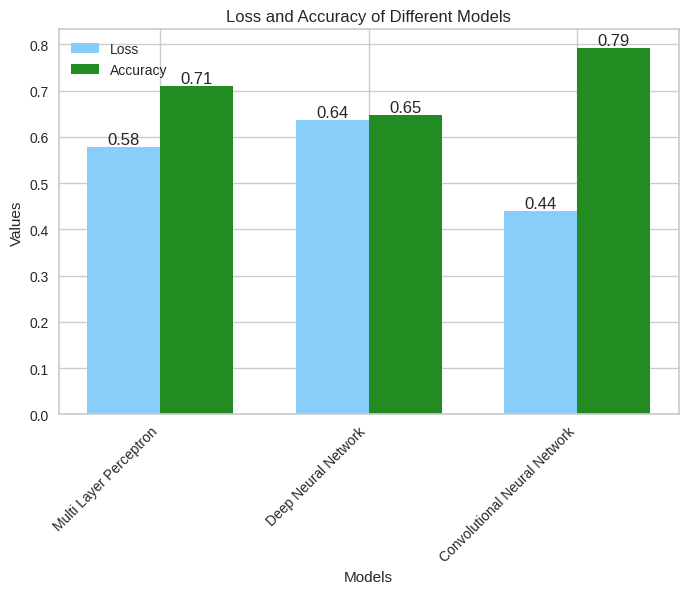

In [43]:
# Data
models = results_nn['Model']
loss = results_nn['Loss']
accuracy = results_nn['Accuracy']

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Bar width
bar_width = 0.35

# Positions for bars
index = range(len(models))

# Plotting loss bars
bars1 = ax.bar(index, loss, bar_width, label='Loss', color='lightskyblue')

# Plotting accuracy bars
bars2 = ax.bar([i + bar_width for i in index], accuracy, bar_width, label='Accuracy', color='forestgreen')

# Adding values on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# X-axis ticks and labels
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models, rotation=45, ha='right')

# Labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Loss and Accuracy of Different Models')

# Legend
ax.legend()

plt.show()

### 3.3 Prediction Abstention

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'TARGET_ABUSER' is the target column
X = df.drop('TARGET_ABUSER', axis=1)
y = df['TARGET_ABUSER']

# Oversampling using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

print(Counter(y))
X, y = SMOTE().fit_resample(X, y)
print(Counter(y))

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 1: Run Random Forest algorithm and show evaluation results
print("Step 1: Running Random Forest without abstention...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest model without abstention
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions, target_names=['Non-Abuser', 'Abuser'])
print("Random Forest Accuracy (without abstention):", rf_accuracy)
print("Confusion Matrix (without abstention):")
print(rf_cm)
print("Classification Report (without abstention):")
print(rf_report)

# Step 2: Run prediction abstention part
def predict_with_abstention(model, X, confidence_threshold):
    probabilities = model.predict_proba(X)
    max_probabilities = np.max(probabilities, axis=1)
    predictions = np.argmax(probabilities, axis=1)
    abstain_mask = max_probabilities < confidence_threshold
    predictions[abstain_mask] = -1
    return predictions

# Step 3: Run Random Forest algorithm with prediction abstention and show evaluation results
print("\nStep 3: Running Random Forest with abstention...")
confidence_threshold = 0.51  # Define your confidence threshold
abstention_predictions = predict_with_abstention(rf_model, X_test, confidence_threshold)

# Evaluate Random Forest model with abstention
abstention_accuracy = accuracy_score(y_test, abstention_predictions)
abstention_cm = confusion_matrix(y_test, abstention_predictions)
abstention_report = classification_report(y_test, abstention_predictions, target_names=['Abstain','Non-Abuser', 'Abuser'])
print("Random Forest Accuracy (with abstention):", abstention_accuracy)
print("Confusion Matrix (with abstention):")
print(abstention_cm)
print("Classification Report (with abstention):")
print(abstention_report)


Counter({0: 25193, 1: 5867})
Counter({0: 25193, 1: 25193})
Step 1: Running Random Forest without abstention...
Random Forest Accuracy (without abstention): 0.8509962689529253
Confusion Matrix (without abstention):
[[5600  706]
 [1171 5120]]
Classification Report (without abstention):
              precision    recall  f1-score   support

  Non-Abuser       0.83      0.89      0.86      6306
      Abuser       0.88      0.81      0.85      6291

    accuracy                           0.85     12597
   macro avg       0.85      0.85      0.85     12597
weighted avg       0.85      0.85      0.85     12597


Step 3: Running Random Forest with abstention...
Random Forest Accuracy (with abstention): 0.8484559815829166
Confusion Matrix (with abstention):
[[   0    0    0]
 [  32 5568  706]
 [  37 1134 5120]]
Classification Report (with abstention):
              precision    recall  f1-score   support

     Abstain       0.00      0.00      0.00         0
  Non-Abuser       0.83      0.88   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 3.4 Auto ML libraries

In [40]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/de_sa_2021_2022.xlsx")

In [41]:
from pycaret.classification import *
exp1 = setup(df, target='TARGET_ABUSER', session_id=123)

,Description,Value
0,Session id,123
1,Target,TARGET_ABUSER
2,Target type,Binary
3,Original data shape,"(31060, 48)"
4,Transformed data shape,"(31060, 48)"
5,Transformed train set shape,"(21742, 48)"
6,Transformed test set shape,"(9318, 48)"
7,Numeric features,47
8,Preprocess,True
9,Imputation type,simple


In [42]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8126,0.6580,0.0258,0.5950,0.0494,0.0342,0.0939,4.0240
lightgbm,Light Gradient Boosting Machine,0.8123,0.6849,0.0533,0.5329,0.0968,0.0647,0.1217,2.1450
gbc,Gradient Boosting Classifier,0.8122,0.6854,0.0331,0.5536,0.0624,0.0419,0.0992,3.7910
ada,Ada Boost Classifier,0.8119,0.6749,0.0458,0.5160,0.0839,0.0554,0.1092,0.8230
dummy,Dummy Classifier,0.8111,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0670
ridge,Ridge Classifier,0.8110,0.6536,0.0000,0.0000,0.0000,-0.0003,-0.0025,0.0810
et,Extra Trees Classifier,0.8099,0.6546,0.0356,0.4604,0.0659,0.0398,0.0839,4.2840
lr,Logistic Regression,0.8098,0.6529,0.0058,0.3296,0.0115,0.0046,0.0197,3.8820
lda,Linear Discriminant Analysis,0.8097,0.6536,0.0078,0.3612,0.0152,0.0068,0.0269,0.1870
xgboost,Extreme Gradient Boosting,0.8029,0.6631,0.0972,0.4096,0.1567,0.0909,0.1218,0.4680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]